In [1066]:
import numpy as np

In [1067]:
import pickle

with open('assignment-one-test-parameters.pkl', 'rb') as f:
    data = pickle.load(f)
data

{'w1': array([[-0.00529397,  0.37932295],
        [-0.58198076, -0.5203875 ],
        [-0.27234524,  0.1896159 ],
        [-0.01401001,  0.56065756],
        [-0.06275153,  0.18710935],
        [-0.2136969 , -0.13899273],
        [-0.6755334 , -0.46830416],
        [-0.29148576,  0.02619374],
        [ 0.27954417,  0.42428023],
        [-0.47937673, -0.30791873]], dtype=float32),
 'w2': array([[-0.12326556,  0.27322105, -0.2049724 , -0.14557004, -0.2209295 ,
         -0.2961666 , -0.18459494,  0.27182874,  0.14110664,  0.1532669 ],
        [ 0.01663092, -0.16212475,  0.05350089, -0.2952602 , -0.22849551,
         -0.1630249 ,  0.19952008,  0.18541107, -0.14024544, -0.01141027],
        [ 0.20224687,  0.3143725 ,  0.12550515,  0.04272011,  0.21202639,
         -0.18619564,  0.05892715, -0.24517313, -0.21917307, -0.16335806],
        [ 0.14308453,  0.12717429, -0.18731831,  0.09553465,  0.1736002 ,
         -0.03991345,  0.01207405,  0.07327145,  0.19618031,  0.30364004],
        [-0.243

In [1068]:
class Add():
    '''
    Adition with forward and backward pass.
    '''
    def __init__(self):
        pass

    def forward(self, input1, input2):
        '''
        Performs a forward pass.
        '''
        self.input1 = input1
        self.input2 = input2
        self.output = self.input1 + self.input2
        return self.output
    
    def backward(self, prev_grad):
        '''
        Receives the Loss Gradient from previous operator and performs a backward pass. 
        '''
        self.grad = prev_grad
        return self.grad

In [1069]:
class Mult():
    '''
    Multiplication with forward and backward pass.
    '''
    def __init__(self):
        pass

    def forward(self, input1, input2):
        '''
        Performs a forward pass. It is order sensitive.
        '''
        self.input1 = input1
        self.input2 = input2
        self.output = np.matmul(self.input1, self.input2)
        return self.output
    
    def backward(self, prev_grad):
        '''
        Receives the Loss Gradient from previous operator and performs a backward pass.\n
        First output corresponds to `input1`.\n
        Second output corresponds to `input2`.
        '''
        self.grad1 = np.matmul(prev_grad, self.input2.T)
        self.grad2 = np.matmul(self.input1.T, prev_grad)
        return self.grad1, self.grad2

In [1070]:
class Relu():
    '''
    Relu with forward and backward pass
    '''

    def __init__(self):
        pass

    def forward(self, input):
        '''
        Performs a forward pass.
        '''
        self.input = input
        self.output = np.maximum(0, self.input)
        return self.output
    
    def backward(self, prev_grad):
        '''
        Receives the Loss Gradient from previous operator and performs a backward pass.\n
        It uses element-wise multiplication for new gradient.
        '''
        mask = np.zeros_like(self.input)
        mask[self.input > 0] = 1
        self.grad = np.multiply(prev_grad, mask)
        return self.grad

In [1071]:
class Regression:
    '''
    Linear Regression.
    '''
    def __init__(self, target):
        self.target = target

    def loss(self, predicted):
        '''
        Returns the sum of the losses for Linear Regression
        '''
        #self.predicted = predicted
        self.output = np.mean(np.power(self.target - predicted, 2)/2)
        return self.output

    def gradient(self, predicted):
        '''
        Returns the difference between the `expected` and `actual` value.
        '''
        self.grad = (predicted - self.target)/len(self.target)
        return self.grad

In [1072]:
class Binary:
    '''
    Binary Clasification.
    '''
    def __init__(self, target):
        self.target = np.reciprocal(1 + np.exp(x * -1))
        

    def loss(self, predicted):
        '''
        Returns the sum of the losses for Binary Classification.
        '''
        predicted = 1 / (1 + np.exp(predicted * -1)) 
        self.output = -1 * np.sum(np.multiply(predicted, np.log(self.target)) + np.multiply((1 - predicted), np.log(1 - self.target)))

    def gradient(self, predicted):
        '''
        Returns the difference between the `expected` and `actual` value.
        '''
        predicted = 1 / (1 + np.exp(predicted * -1))
        self.grad = self.target - predicted
        return self.grad

In [1073]:
'''
y = np.matrix("1;2")
y_pred = np.matrix("4;5")

b = Binary(y)
print(b.target)
#los = b.loss(y_pred)
'''

'\ny = np.matrix("1;2")\ny_pred = np.matrix("4;5")\n\nb = Binary(y)\nprint(b.target)\n#los = b.loss(y_pred)\n'

In [1074]:
class FullyConnectedLayer():
    '''
    Fully-Connected Layer.
    '''
    def __init__(self, weights, bias, relu_activation=False):
        '''
        `relu_activation` can be set to `True` to use ReLU in layer.
        '''
        self.weights = weights
        self.bias = bias
        self.add = Add()
        self.mult = Mult()
        self.relu_activation = relu_activation
        if self.relu_activation:
            self.relu = Relu()
    
    def forward(self, input):
        '''
        Performs a forward pass for a Linear Layer.
        '''
        self.input = input
        self.output = self.mult.forward(self.input, self.weights)
        self.output = self.add.forward(self.output, self.bias)
        if self.relu_activation:
            self.output = self.relu.forward(self.output) 
        return self.output
    
    def backward(self, prev_grad, learning_rate):
        '''
        Performs a backward pass for a Linear Layer.\n
        First output gradient corresponds to `input`.\n
        Second output gradient corresponds to `weights`.\n
        Third output gradient corresponds to the `bias`.
        '''
        if self.relu_activation:
            self.grad = self.relu.backward(prev_grad)
            self.grad = self.add.backward(self.grad)        
        else:
            self.grad = self.add.backward(prev_grad)
        self.grad1, self.grad2 = self.mult.backward(self.grad)

        self.weights = self.weights - (learning_rate * self.grad2)
        self.bias = self.bias - (learning_rate * self.add.grad) 

        return self.grad1, self.grad2, self.add.grad

In [1075]:
x, w1, w2, w3, b1, b2, b3, y = data["inputs"], data["w1"], data["w2"], data["w3"], data["b1"], data["b2"], data["b3"], data["targets"] 
x = x
w1 = w1.T
w2 = w2.T
w3 = w3.T
y = np.matrix(y).T
print(x.shape)
print(w1.shape)
print(w2.shape)
print(w3.shape)
print(b1.shape)
print(b2.shape)
print(b3.shape)
print(y.shape)

(200, 2)
(2, 10)
(10, 10)
(10, 1)
(10,)
(10,)
(1,)
(200, 1)


In [1076]:
learning_rate = 0.01
epochs = 5
losses = []
grad_avgs = []
first_w1 = 0
first_b1 = 0

l1 = FullyConnectedLayer(w1, b1, True)
l2 = FullyConnectedLayer(w2, b2, True)
l3 = FullyConnectedLayer(w3, b3, False)
p = Regression(y)

for epoch in range(epochs):
    y_pred = l1.forward(x)
    y_pred = l2.forward(y_pred)
    y_pred = l3.forward(y_pred)

    grad = p.gradient(y_pred)
    lo = p.loss(y_pred)
    losses.append(lo)
    
    grad, grad_w3, grad_b3 = l3.backward(grad, learning_rate)
    grad, grad_w2, grad_b2 = l2.backward(grad, learning_rate)
    grad, grad_w1, grad_b1 = l1.backward(grad, learning_rate)

    if epoch == 0:
        first_w1 = l1.weights
        first_b1 = l1.bias

    avg = [np.average(w3), np.average(w2), np.average(w1), np.average(b3),
          np.average(b2), np.average(b1)]
    grad_avg = np.average(avg)
    grad_avgs.append(grad_avg)
        
print("losses:", losses)
#print(first_layer_w_b)
#print(grad_avgs)

losses: [0.5380007999139312, 0.5366356880927442, 0.5352861417382162, 0.5339519224838302, 0.5326342480133957]


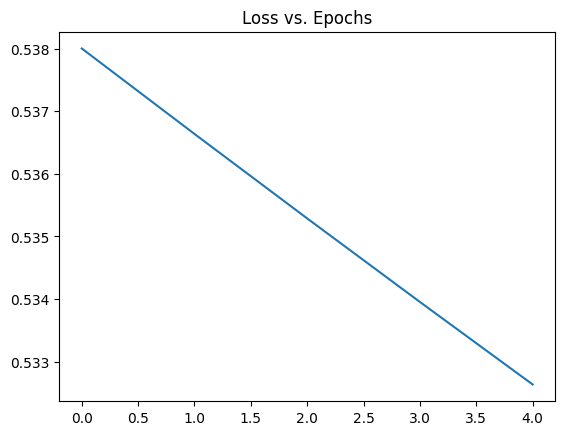

In [1077]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(losses)),losses)
plt.title("Loss vs. Epochs")
plt.show()